In [83]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
df =  pd.read_csv("https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv")
df.sample(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
13,91992.39,135495.07,252664.93,California,134307.35
18,91749.16,114175.79,294919.57,Florida,124266.90
42,23640.93,96189.63,148001.11,California,71498.49
22,73994.56,122782.75,303319.26,Florida,110352.25
35,46014.02,85047.44,205517.64,New York,96479.51
5,131876.90,99814.71,362861.36,New York,156991.12
14,119943.24,156547.42,256512.92,Florida,132602.65
21,78389.47,153773.43,299737.29,New York,111313.02
20,76253.86,113867.30,298664.47,California,118474.03


In [5]:
df.duplicated().any()

False

<AxesSubplot:>

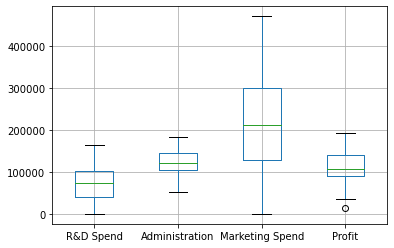

In [6]:
df.boxplot()

In [7]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
#df['R&D Spend','Administration','Marketing Spend','State','Profit']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

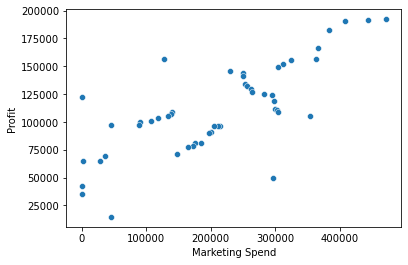

In [9]:
sns.scatterplot(df['Marketing Spend'],df['Profit'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

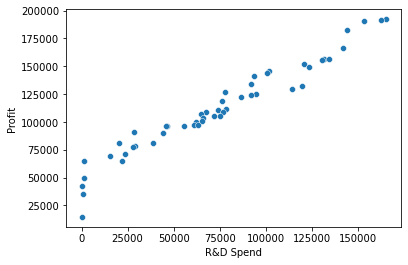

In [10]:
sns.scatterplot(df['R&D Spend'],df['Profit'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Administration', ylabel='Profit'>

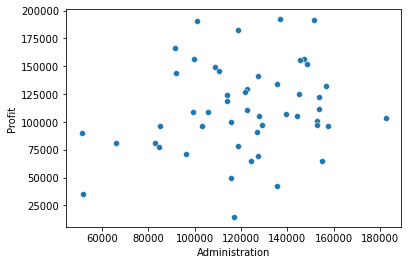

In [11]:
sns.scatterplot(df['Administration'],df['Profit'])

In [12]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

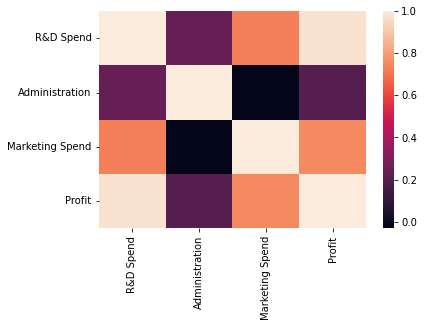

In [13]:
sns.heatmap(df.corr())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

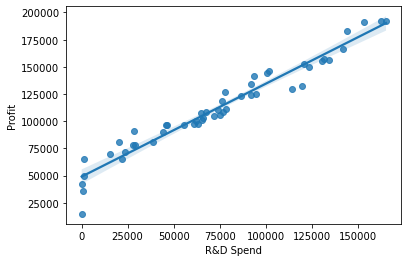

In [14]:
sns.regplot(df['R&D Spend'],df['Profit'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [16]:
State = LabelEncoder()
df['State'] = State.fit_transform(df['State'])

In [17]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [18]:
df.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.104685,0.972900
Administration,0.241955,1.000000,-0.032154,0.011847,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.077670,0.747766
State,0.104685,0.011847,0.077670,1.000000,0.101796
Profit,0.972900,0.200717,0.747766,0.101796,1.000000


<AxesSubplot:>

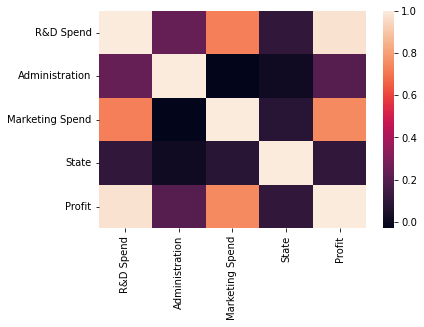

In [19]:
sns.heatmap(df.corr())

In [20]:
X = df[['R&D Spend','Administration','Marketing Spend']]
Y = df[['Profit']]

In [21]:
 X_train, X_test, y_train, y_test  = train_test_split(X,Y,test_size= .25)

In [22]:
LRModel =LinearRegression()
LRModel.fit(X_train,y_train)

LinearRegression()

In [23]:
Y_pred = LRModel.predict(X_test)
Y_pred[:,0]

array([102130.07473668, 116960.17214164, 157565.2300744 ,  73759.93311969,
       170845.84057904,  99160.71735251,  63917.27636766,  55171.6332079 ,
       116398.24156036,  77902.73849143, 101612.86106815, 135693.74995293,
        52530.28668905])

In [24]:
y_test

,Profit
28,103282.38
16,126992.93
7,155752.60
42,71498.49
3,182901.99
31,97483.56
43,69758.98
48,35673.41
21,111313.02
41,77798.83


In [25]:
df['Total Spend']= df['R&D Spend']+df['Administration']+df['Marketing Spend']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Spend', ylabel='Profit'>

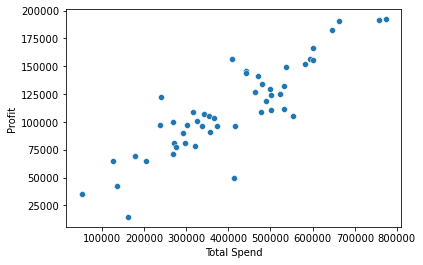

In [26]:
sns.scatterplot('Total Spend','Profit',data= df)

In [27]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
Total Spend        False
dtype: bool

In [28]:
df.isna().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
Total Spend        False
dtype: bool

In [29]:
#print(Y_pred, y_test)

In [30]:
mae = mean_absolute_error(y_test, Y_pred)
mse = mean_squared_error(y_test, Y_pred)
rmse = mean_squared_error(y_test, Y_pred, squared=False)
r2 = r2_score(y_test, Y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Absolute Error (MAE): 8277.79
Mean Squared Error (MSE): 169802999.11
Root Mean Squared Error (RMSE): 13030.85
R-squared (R2): 0.92


In [68]:
#Supprot vector Regression
SVRModel = SVR()

In [69]:
SVRModel.fit(X_train,y_train)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [70]:
PredSVR = SVRModel.predict(X_test)

In [71]:
maeSvR = mean_absolute_error( y_test,PredSVR)
mseSVR = mean_squared_error(y_test,PredSVR)
rmseSVR = mean_squared_error(y_test, PredSVR, squared=False)
r2SVR = r2_score(y_test, PredSVR)


In [72]:
print('Mean Absulute error of Support Vector Regression : ',maeSvR)
print('Mean Squared error of Support Vector Regression : ',mseSVR)
print('Root Mean Squared error of Support Vector Regression : ',rmseSVR)
print('r2Score of Svr', r2SVR)

Mean Absulute error of Support Vector Regression :  36708.860267351
Mean Squared error of Support Vector Regression :  2122032149.4328814
Root Mean Squared error of Support Vector Regression :  46065.520179770916
r2Score of Svr -0.04316807874389261


In [73]:
# Decision Tree Regressor
modelDTR = DecisionTreeRegressor()

In [74]:
modelDTR.fit(X_train,y_train)

DecisionTreeRegressor()

In [75]:
PredDTR = modelDTR.predict(X_test)

In [76]:
maeDTR = mean_absolute_error( y_test,PredDTR)
mseDTR = mean_squared_error(y_test,PredDTR)
rmseDTR = mean_squared_error(y_test, PredDTR, squared=False)
r2DTR = r2_score(y_test,PredDTR)

In [77]:
print('Mean Absolute Error of DTR: ', maeDTR)
print('Mean Squared Error of DTR: ', mseDTR)
print('Root mean squared Error: ', rmseDTR)
print('r2Score of Svr :', r2DTR)

Mean Absolute Error of DTR:  10898.493076923081
Mean Squared Error of DTR:  317314155.263977
Root mean squared Error:  17813.313988811205
r2Score of Svr : 0.8440117894568997


In [99]:
# Random Forest Regressor
ModelRandomForest = RandomForestRegressor()

In [100]:
ModelRandomForest.fit(X_train,y_train)

C:\Users\ABRAHAM\AppData\Local\Temp\ipykernel_180\997372662.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ModelRandomForest.fit(X_train,y_train)


RandomForestRegressor()

In [101]:
PredRF= ModelRandomForest.predict(X_test)

In [102]:
MaeRF  = mean_absolute_error(y_test, PredRF)
MseRF = mean_squared_error(y_test, PredRF)
RmseRf = mean_squared_error(y_test,PredRF, squared=False)
R2scoreRF = r2_score(y_test,PredRF)

In [103]:
print('Mean Absolute Error of Random Forest: ',MaeRF)
print('Mean Squared Error of Random Forest: ',MseRF)
print('Root Mean Square Error of Random Forest: ',RmseRf)
print('R2 Score of Random Forest: ',R2scoreRF)


Mean Absolute Error of Random Forest:  8244.179500000031
Mean Squared Error of Random Forest:  211455870.78863686
Root Mean Square Error of Random Forest:  14541.522299561242
R2 Score of Random Forest:  0.8960505784379135


In [104]:
modelAdaboost = AdaBoostRegressor()
modelAdaboost.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor()

In [105]:
PredBooster =modelAdaboost.predict(X_test)

In [106]:
maeBooster =  mean_absolute_error(y_test,PredBooster)
mseBooster = mean_squared_error(y_test,PredBooster)
rseBooster = mean_squared_error(y_test,PredBooster,squared=False)
r2ScoreBooster = r2_score(y_test,PredBooster)

In [107]:
print('Mean Absolute Error of AdaBooster: ',maeBooster)
print('Mean Squared Error of AdaBooster: ',mseBooster)
print('Root Mean Square Error of AdaBooster: ',rseBooster)
print('R2 Score of AdaBooster: ',r2ScoreBooster)

Mean Absolute Error of AdaBooster:  9010.586017094014
Mean Squared Error of AdaBooster:  196785746.28665975
Root Mean Square Error of AdaBooster:  14028.034298741208
R2 Score of AdaBooster:  0.9032622531506416
